In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_20 = pd.read_csv('churn_data/churn-bigml-20.csv')
df_80 = pd.read_csv('churn_data/churn-bigml-80.csv')


## Understanding Dataset

In [119]:
df_20.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [120]:
df_20.shape

(667, 20)

In [121]:
df_80.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [122]:
df_80.shape

(2666, 20)

In [123]:
df20_state_count = df_20['State'].value_counts().count()
df80_state_count = df_80['State'].value_counts().count()

print("DF_20 state count:", df20_state_count)
print("DF_80 state count:", df80_state_count)


DF_20 state count: 51
DF_80 state count: 51


In [124]:
print("OK State Count", (df_20['State'] == 'OK').sum())
print("OK State Count", (df_80['State'] == 'OK').sum())

OK State Count 9
OK State Count 52


- So the dataset both have same columns and the count is 20 and also the state count is same and <br> they are same state although the count can be less or more.
- We will combine the datasets.

In [125]:
combined_df = pd.concat([df_20,df_80], ignore_index=True)

In [126]:
combined_df.shape

(3333, 20)

In [127]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

From the Non-null Count it's clear there is no null value

In [128]:
combined_df.duplicated().sum()

np.int64(0)

There are no duplicates.

In [129]:
for i in combined_df.columns:
    print("Column", i, "has" ,combined_df[i].nunique(), "unique values")

Column State has 51 unique values
Column Account length has 212 unique values
Column Area code has 3 unique values
Column International plan has 2 unique values
Column Voice mail plan has 2 unique values
Column Number vmail messages has 46 unique values
Column Total day minutes has 1667 unique values
Column Total day calls has 119 unique values
Column Total day charge has 1667 unique values
Column Total eve minutes has 1611 unique values
Column Total eve calls has 123 unique values
Column Total eve charge has 1440 unique values
Column Total night minutes has 1591 unique values
Column Total night calls has 120 unique values
Column Total night charge has 933 unique values
Column Total intl minutes has 162 unique values
Column Total intl calls has 21 unique values
Column Total intl charge has 162 unique values
Column Customer service calls has 10 unique values
Column Churn has 2 unique values


Here International plan, Voice mail plan and Churn we should convert it into numerical cols

In [130]:
combined_df['International plan'] = combined_df['International plan'].map({"Yes": 1, "No": 0})
combined_df['Voice mail plan'] = combined_df['Voice mail plan'].map({"Yes": 1, "No": 0})
combined_df['Churn'] = combined_df['Churn'].astype(int)

In [131]:
combined_df.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
852,OK,88,408,0,0,0,65.4,97,11.12,168.2,76,14.30,236.0,113,10.62,13.8,1,3.73,2,0
1205,TX,75,415,1,0,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1,1
1235,OR,129,510,0,1,36,192.8,103,32.78,177.0,83,15.05,216.5,118,9.74,16.4,5,4.43,1,0
1785,MN,37,415,0,1,20,264.7,81,45.00,216.5,110,18.40,210.7,102,9.48,10.4,7,2.81,0,0
2256,TX,73,408,0,0,0,286.4,109,48.69,178.2,67,15.15,214.2,152,9.64,10.7,14,2.89,1,1


In [132]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

- Saving the clean churn file

In [133]:
combined_df.to_csv('clean_churn.csv')

EDA

<Axes: xlabel='Churn'>

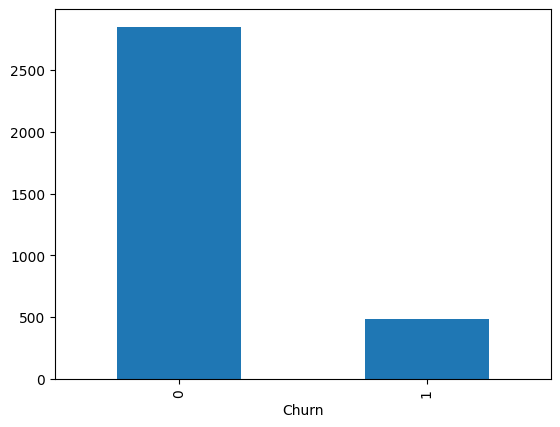

In [134]:
combined_df['Churn'].value_counts().plot(kind='bar')

In [135]:
combined_df['Churn'].value_counts(normalize=True) * 100

Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

- Here basically we are showing the churn where 85.5% aren't leaving and 14.5% is the churn rate.
- This also means our dataset is quiet imbalance, we need to use some sampling tenchique.
- Also normalize represent in proporation rather than in count of a value.

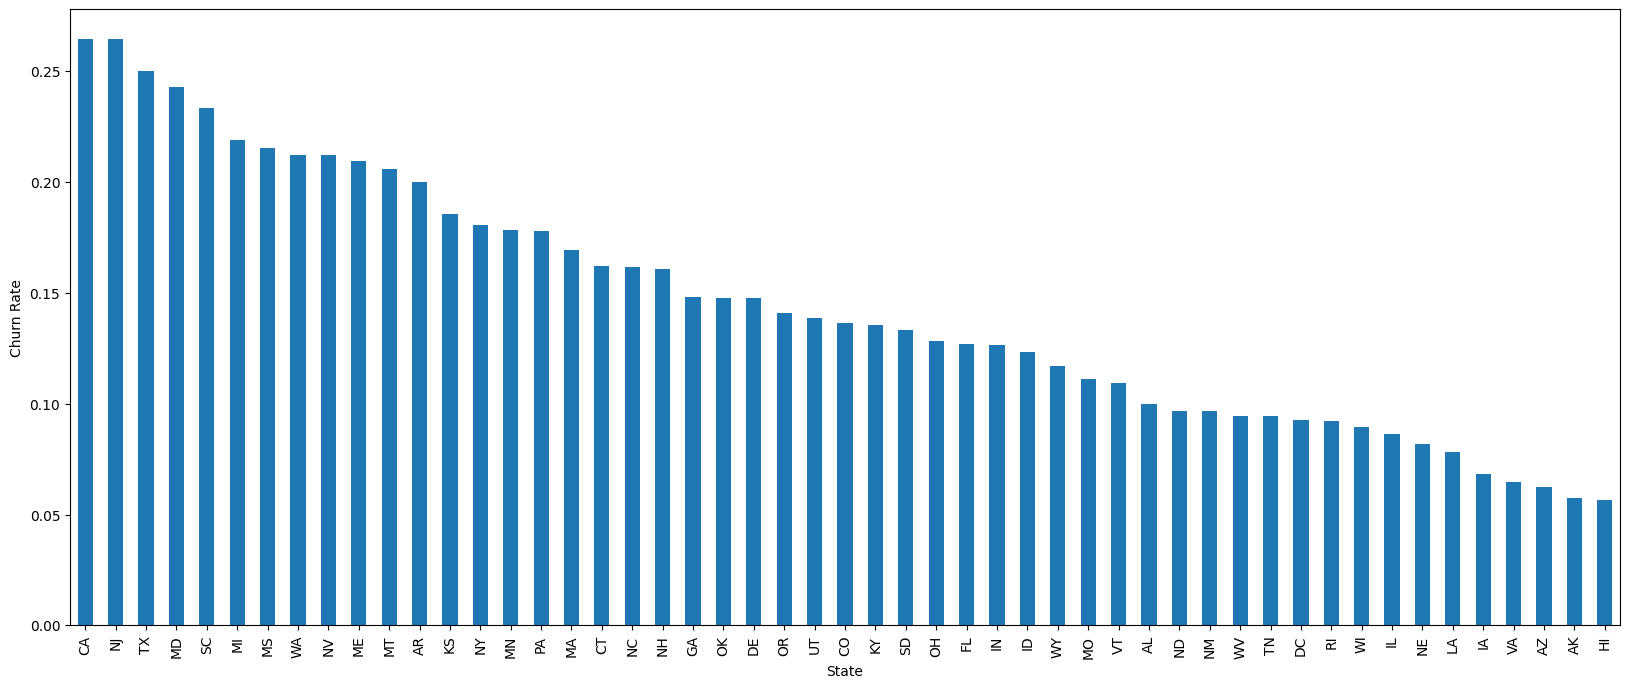

In [136]:
state_churn = combined_df.groupby('State')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(20,8))
state_churn.plot(kind='bar')
plt.ylabel("Churn Rate")
plt.show()

This basically shows the churn rate from highest and down

<Axes: xlabel='Churn', ylabel='count'>

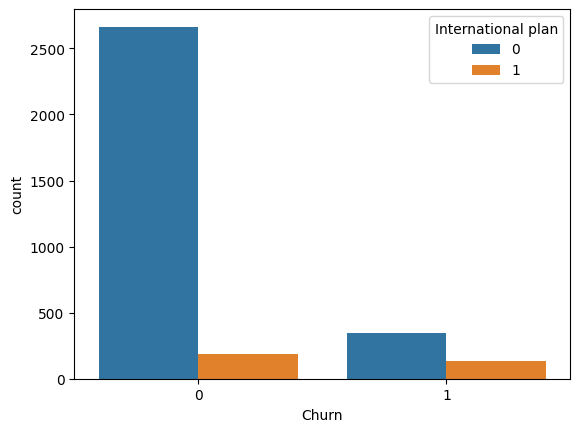

In [137]:
sns.countplot(x='Churn',hue='International plan' ,data=combined_df)

In [138]:
combined_df.groupby('Churn')['International plan'].value_counts()

Churn  International plan
0      0                     2664
       1                      186
1      0                      346
       1                      137
Name: count, dtype: int64

so those who had intl plan the churn rate is high. 137 / 186 + 137 ~ 42%

<Axes: xlabel='Churn', ylabel='count'>

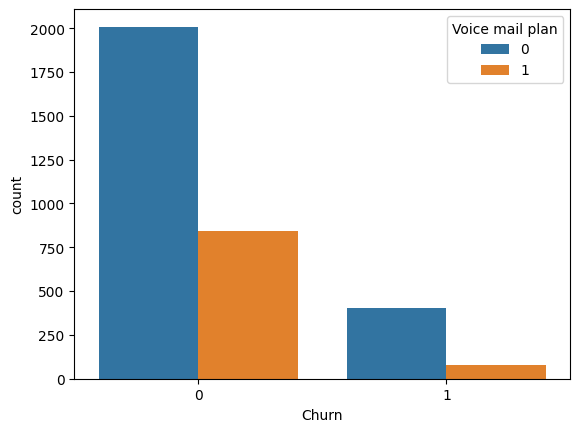

In [139]:
sns.countplot(x='Churn',hue='Voice mail plan' ,data=combined_df)

In [140]:
combined_df.groupby('Voice mail plan')['Churn'].value_counts()

Voice mail plan  Churn
0                0        2008
                 1         403
1                0         842
                 1          80
Name: count, dtype: int64

So around 16% who had voice plan churn while 29% who had no voice plan churned

<Axes: xlabel='Churn', ylabel='count'>

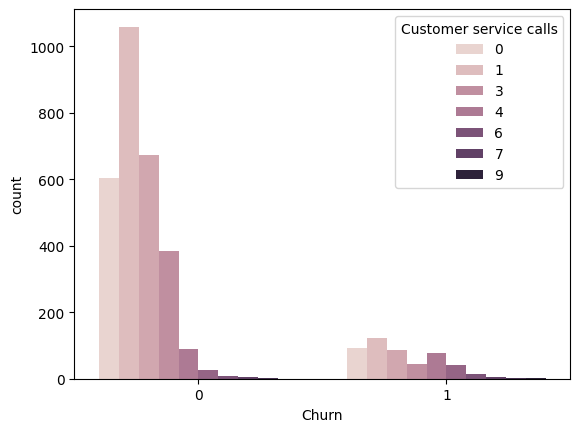

In [141]:
sns.countplot(x='Churn', hue='Customer service calls', data=combined_df)

In [142]:
combined_df.groupby('Customer service calls')['Churn'].value_counts(normalize=True).unstack() * 100

Churn,0,1
Customer service calls,,
0,86.800574,13.199426
1,89.669771,10.330229
2,88.537549,11.462451
3,89.743590,10.256410
4,54.216867,45.783133
5,39.393939,60.606061
6,36.363636,63.636364
7,44.444444,55.555556
8,50.000000,50.000000


- So this means as we go down (0-3) the churn rate is low as we go up the churn rate increase 
- So Customer who are to frequently call are more likely to churn

<Axes: >

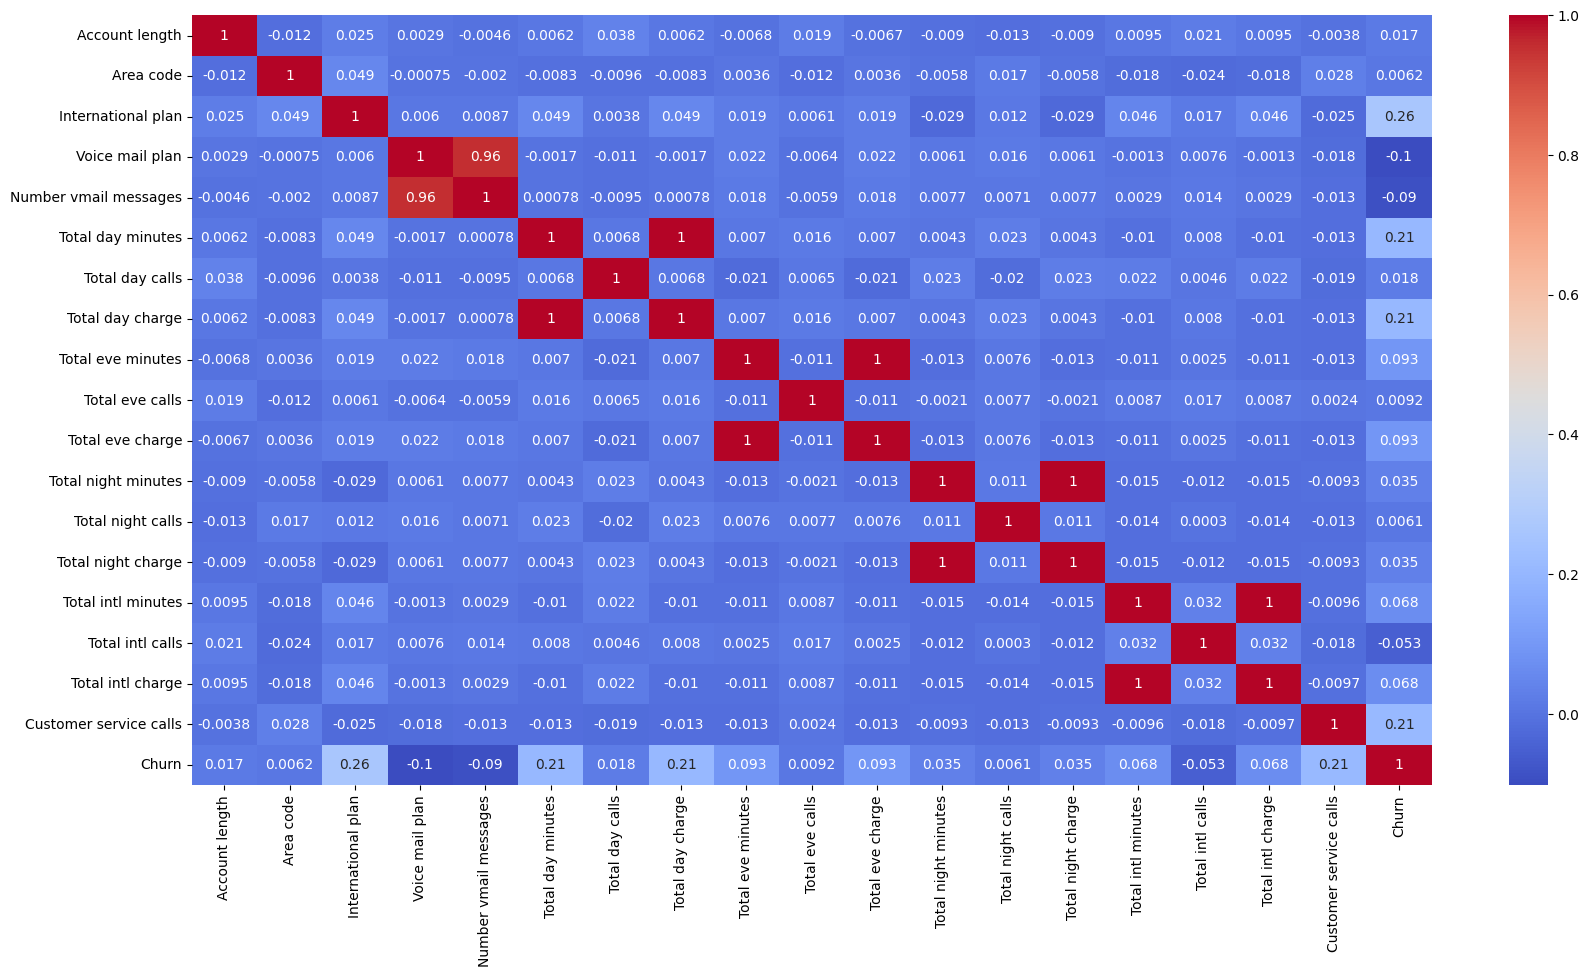

In [143]:
numerical_cols = combined_df.select_dtypes(include=['int','float']).columns
corr_cols = combined_df[numerical_cols].corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_cols, annot=True, cmap='coolwarm')

- Voice mail plan, Total day minutes, Total eve minutes, Total night minutes, Total intl minutes <br>
we will remove these as they had high correlation

In [144]:
col_to_drop = ['Voice mail plan', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
combined_df.drop(columns=col_to_drop, inplace=True)

In [145]:
combined_df.head()

,State,Account length,Area code,International plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,0
1,IN,65,415,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,1
2,NY,161,415,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,1
3,SC,111,415,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2,0
4,HI,49,510,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1,0


In [146]:
combined_df.shape

(3333, 15)

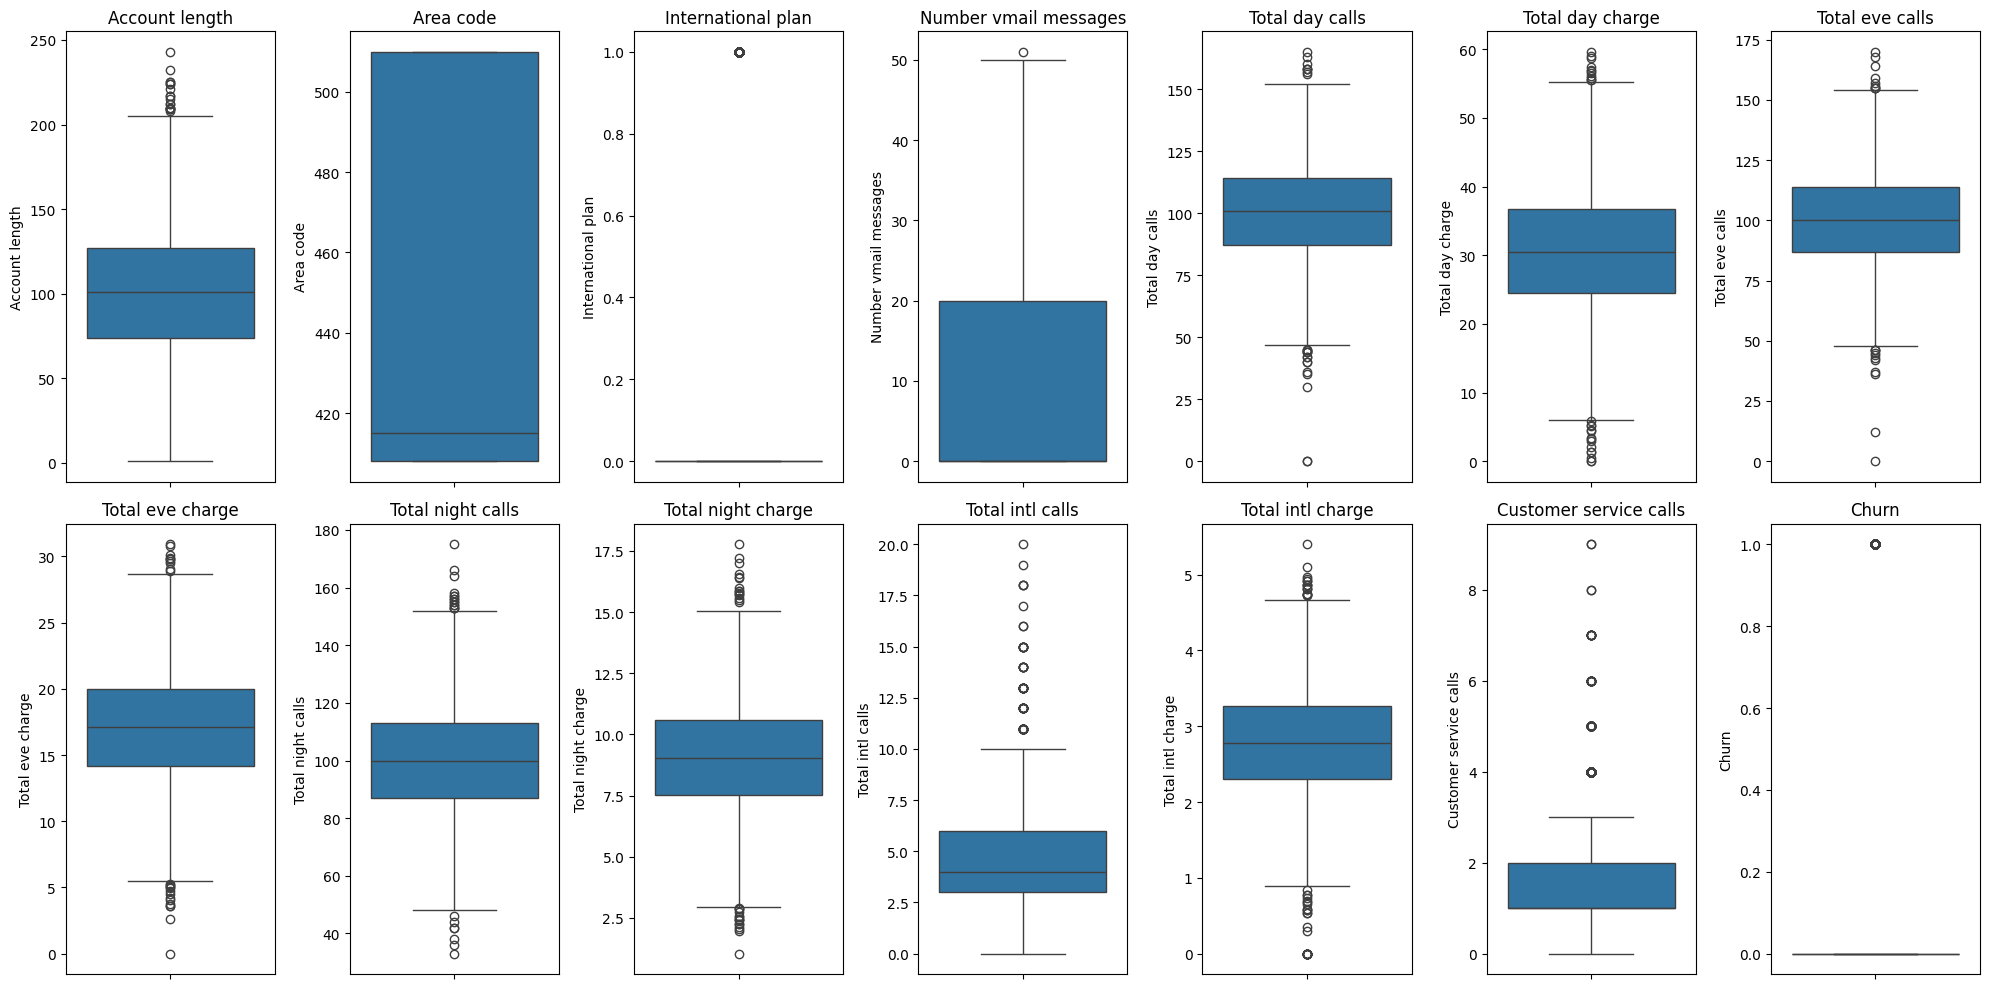

In [147]:
cols = combined_df.select_dtypes(include=['int','float']).columns

fig, axes = plt.subplots(2,7, figsize=(20,10))
axes = axes.flatten()

for i, val in enumerate(cols):
    sns.boxplot(combined_df[val], ax=axes[i])
    axes[i].set_title(val)

plt.tight_layout()
plt.show()

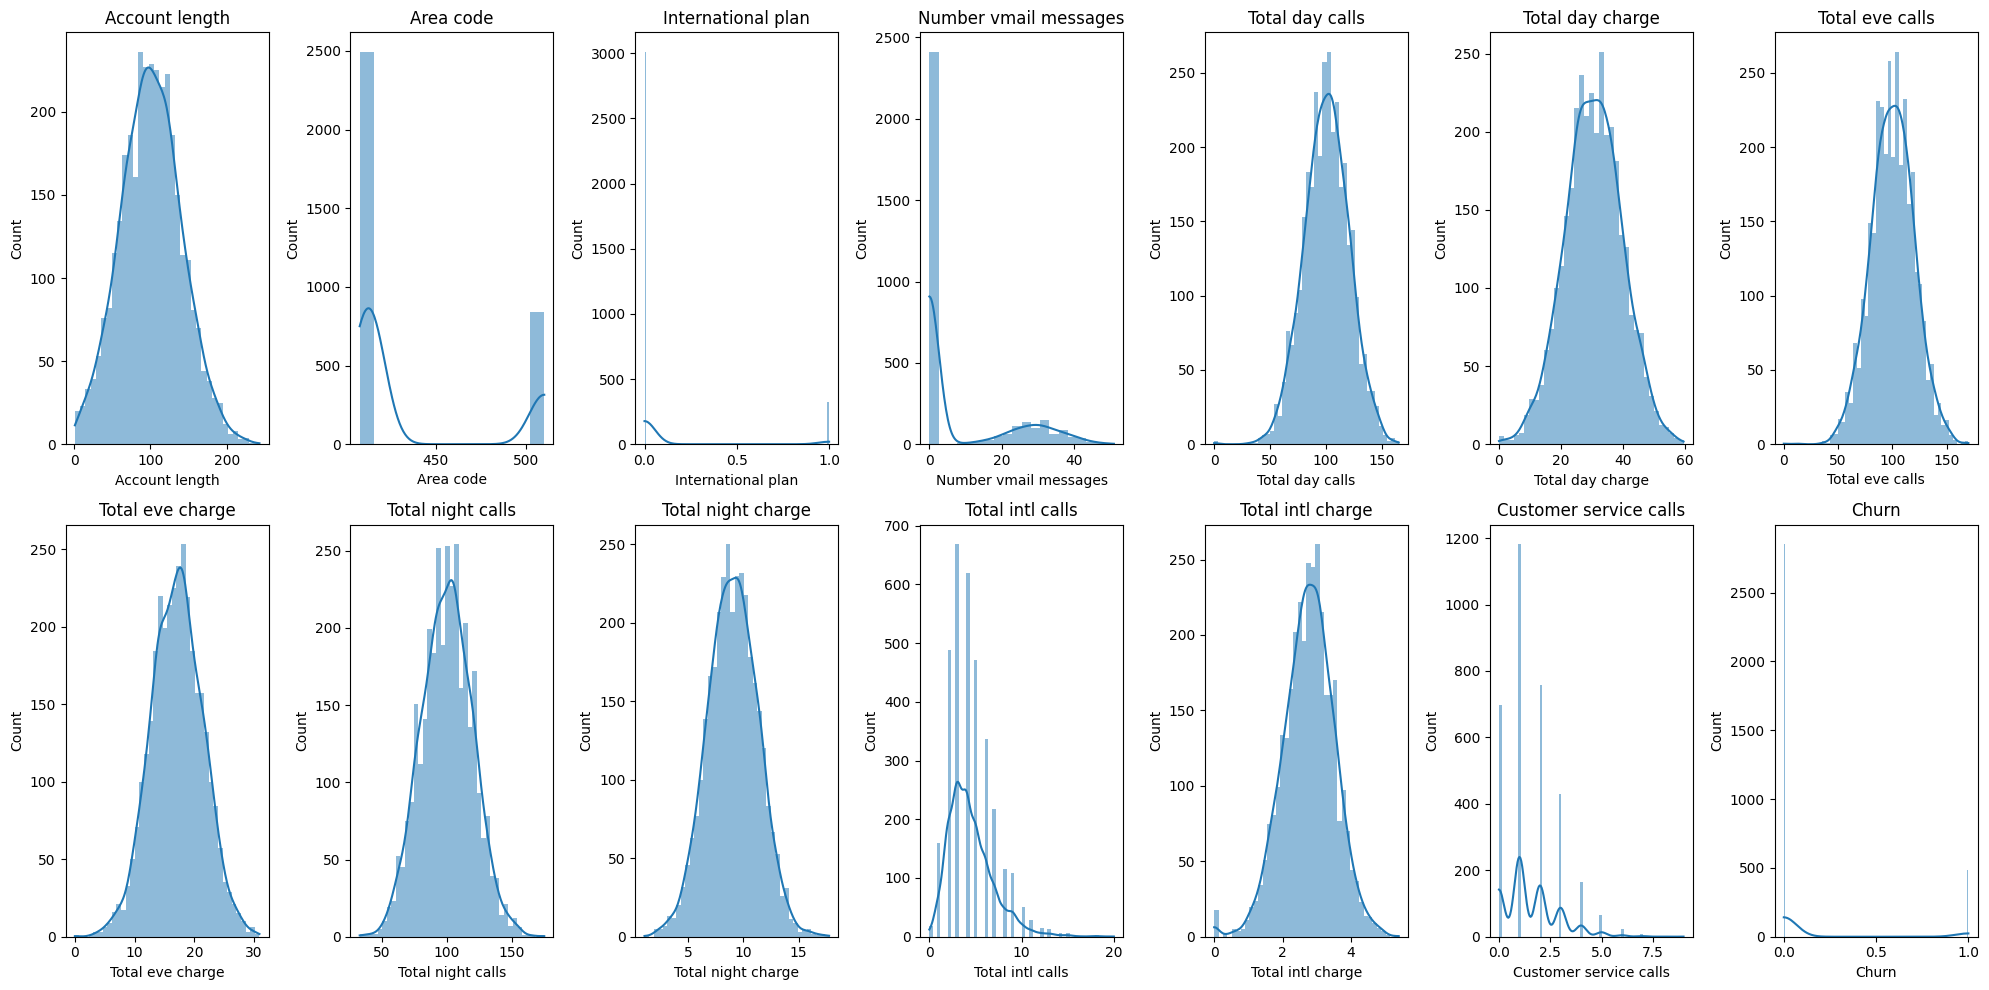

In [148]:
cols = combined_df.select_dtypes(include=['int','float']).columns

fig, axes = plt.subplots(2,7, figsize=(20,10))
axes = axes.flatten()

for i, val in enumerate(cols):
    sns.histplot(combined_df[val], ax=axes[i], kde=True, edgecolor='None')
    axes[i].set_title(val)

plt.tight_layout()
plt.show()

Overall the dataset seems balanced

In [149]:
combined_df['Churn'].value_counts(normalize=True) * 100

Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

In [150]:
for i in combined_df.columns:
    print("Column", i, "has", combined_df[i].nunique(),"values")

Column State has 51 values
Column Account length has 212 values
Column Area code has 3 values
Column International plan has 2 values
Column Number vmail messages has 46 values
Column Total day calls has 119 values
Column Total day charge has 1667 values
Column Total eve calls has 123 values
Column Total eve charge has 1440 values
Column Total night calls has 120 values
Column Total night charge has 933 values
Column Total intl calls has 21 values
Column Total intl charge has 162 values
Column Customer service calls has 10 values
Column Churn has 2 values


Label Encoding

In [151]:
combined_df = pd.get_dummies(combined_df, columns=['State', 'Area code'], drop_first=True, dtype=int)

So we performed 'OHE' from the default get_dummies as state and area code are nominal 

In [152]:
combined_df.head()

,Account length,International plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510
0,117,0,0,97,31.37,80,29.89,90,9.71,4,...,0,0,0,0,0,0,0,0,0,0
1,65,0,0,137,21.95,83,19.42,111,9.40,6,...,0,0,0,0,0,0,0,0,1,0
2,161,0,0,67,56.59,97,27.01,128,7.23,9,...,0,0,0,0,0,0,0,0,1,0
3,111,0,0,103,18.77,102,11.67,105,8.53,6,...,0,0,0,0,0,0,0,0,1,0
4,49,0,0,117,20.28,109,18.28,90,8.04,1,...,0,0,0,0,0,0,0,0,0,1


In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = combined_df.drop(columns=['Churn'])
y = combined_df['Churn']

X_scaled = scaler.fit_transform(X)

So scaled X so that all feature column would be in a certain range <br>
will have mean = 0 , sd = 1

In [154]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.400220,-0.32758,-0.591760,-0.171217,0.087242,-1.009773,2.971322,-0.516604,0.294733,-0.194831,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.181240,-0.153781,-0.993123,-0.580468
1,-0.905784,-0.32758,-0.591760,1.822198,-0.930251,-0.859168,0.542099,0.556704,0.158501,0.617898,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.181240,-0.153781,1.006925,-0.580468
2,1.505299,-0.32758,-0.591760,-1.666277,2.811359,-0.156344,2.303112,1.425573,-0.795122,1.836992,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.181240,-0.153781,1.006925,-0.580468
3,0.249527,-0.32758,-0.591760,0.127796,-1.273736,0.094665,-1.256036,0.250045,-0.223827,0.617898,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.181240,-0.153781,1.006925,-0.580468
4,-1.307631,-0.32758,-0.591760,0.825491,-1.110635,0.446077,0.277599,-0.516604,-0.439161,-1.413924,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.181240,-0.153781,-0.993123,1.722747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,-0.554168,-0.32758,-0.591760,-0.121381,-0.827638,-1.612194,-0.223558,1.425573,0.404598,0.211534,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.181240,-0.153781,1.006925,-0.580468
3329,2.283878,-0.32758,2.038605,-1.167924,-0.433386,1.299506,0.286880,-0.874374,1.547188,0.617898,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.181240,-0.153781,1.006925,-0.580468
3330,-0.830437,-0.32758,-0.591760,-2.164631,0.942714,-2.264816,-0.938172,1.170023,-0.188670,-0.194831,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,5.517553,-0.153781,1.006925,-0.580468
3331,-1.835055,-0.32758,-0.591760,0.426808,0.019193,-2.114211,1.732349,-0.465494,-0.175486,0.617898,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.181240,-0.153781,-0.993123,1.722747


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Logistic Regression

In [156]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced') 
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the Logistic Regression model: 0.7691

Confusion Matrix:
[[436 135]
 [ 19  77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       571
           1       0.36      0.80      0.50        96

    accuracy                           0.77       667
   macro avg       0.66      0.78      0.67       667
weighted avg       0.87      0.77      0.80       667



** As the Churn was imbalanced we used the class_weight which helped increase the recall
- But this caused our accuracy to decrease which is fine
- Its like suppose 900 '0' & 100 '1' the model will be 90% accurate but this isnt right and happens due to imbalance

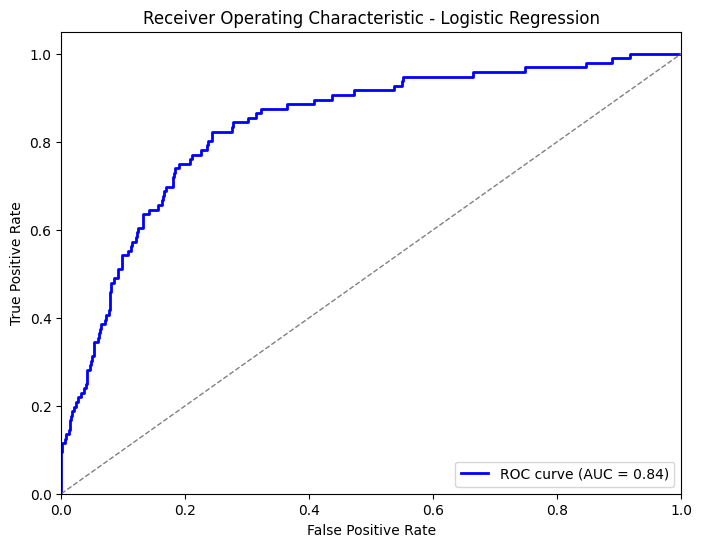

In [157]:
from sklearn.metrics import roc_curve, auc

y_prob = log_reg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## Linear Regression

In [158]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

print(r2_score(y_test, y_pred_lr))
print(mean_squared_error(y_test, y_pred_lr))


0.19478508294548924
0.09921274945719058


** These metric shows that linear regression isnt a great algorithm when it comes for categorical

## KNN 

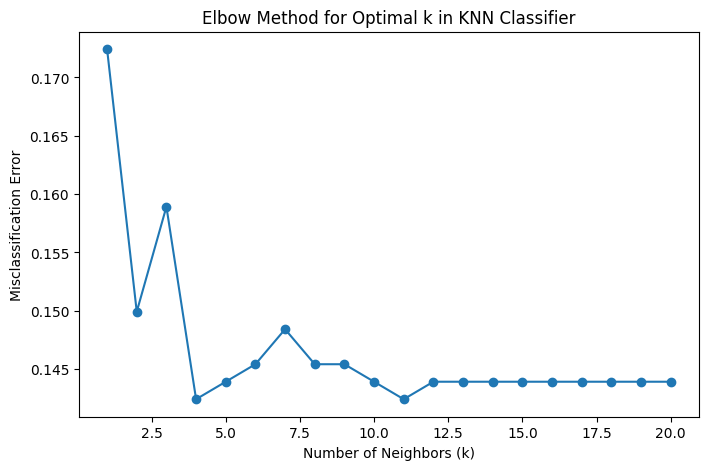

In [159]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 21)
error_rate = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)  
    error_rate.append(error)

plt.figure(figsize=(8,5))
plt.plot(k_values, error_rate, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Misclassification Error")
plt.title("Elbow Method for Optimal k in KNN Classifier")
plt.show()


In [160]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
knn_score = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of the KNN model: {knn_score:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy of the KNN model: 0.8411

Confusion Matrix:
[[550  21]
 [ 85  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       571
           1       0.34      0.11      0.17        96

    accuracy                           0.84       667
   macro avg       0.60      0.54      0.54       667
weighted avg       0.79      0.84      0.81       667



- The recall, f1-score for 1 is low although we tried the weight 
- If we have the k value around 10 recall,f1 is under 0.1 but the precision would increase

## Decision Tree Classifier

In [161]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)

y_pred_tree = tree.predict(X_test)

dt_score = accuracy_score(y_test, y_pred_tree)
print("Accuracy Score:", dt_score)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Accuracy Score: 0.904047976011994

Confusion Matrix:
[[530  41]
 [ 23  73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       571
           1       0.64      0.76      0.70        96

    accuracy                           0.90       667
   macro avg       0.80      0.84      0.82       667
weighted avg       0.91      0.90      0.91       667



In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [None, 3, 5, 7, 10],            
    "min_samples_split": [2, 5, 10],          
    "min_samples_leaf": [1, 2, 4, 5], 
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters found: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score: 0.9407396476730542


In [163]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42, max_depth= 7, min_samples_leaf = 2, min_samples_split = 5)
tree.fit(X_train,y_train)

y_pred_tree = tree.predict(X_test)

dt_score = accuracy_score(y_test, y_pred_tree)
print("Accuracy Score:", dt_score)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Accuracy Score: 0.9370314842578711

Confusion Matrix:
[[555  16]
 [ 26  70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       571
           1       0.81      0.73      0.77        96

    accuracy                           0.94       667
   macro avg       0.88      0.85      0.87       667
weighted avg       0.93      0.94      0.94       667



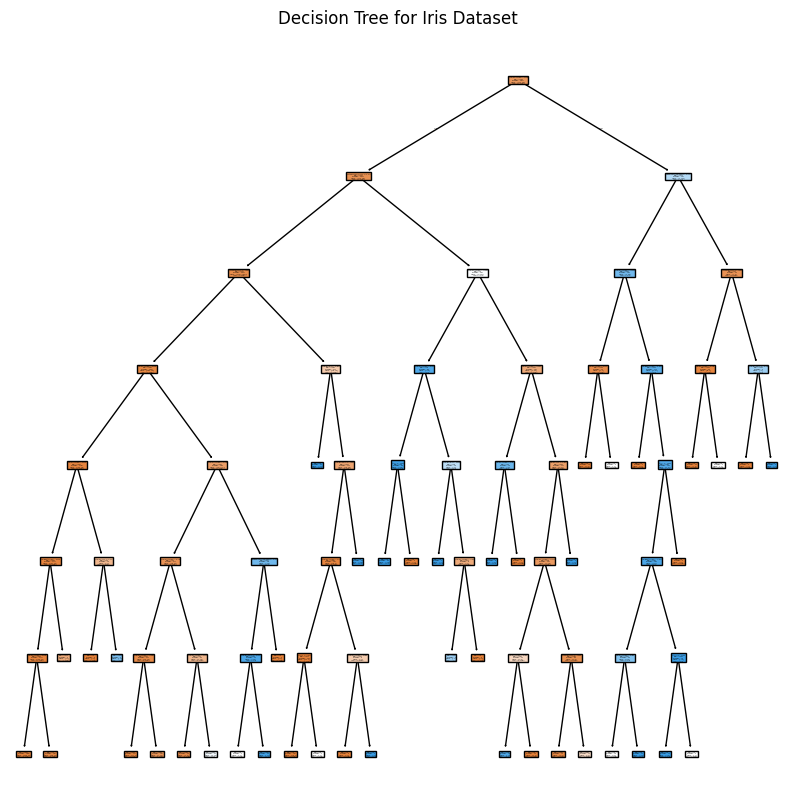

In [164]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(tree,
          filled=True,
          feature_names=X.columns.tolist(),
          class_names=["No Churn", "Churn"])
plt.title("Decision Tree for Iris Dataset")
plt.show()

## KMeans

In [165]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

cluster_labels = {}
for i in range(2):  
    mask = (train_clusters == i)
    cluster_labels[i] = mode(y_train[mask], keepdims=False).mode

y_pred_kmeans = np.array([cluster_labels[c] for c in test_clusters])

print("Accuracy:", accuracy_score(y_test, y_pred_kmeans))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_kmeans))
print("Classification Report:\n", classification_report(y_test, y_pred_kmeans))

print("Adjusted Rand Index:", adjusted_rand_score(y_test, test_clusters))


Accuracy: 0.856071964017991
Confusion Matrix:
 [[571   0]
 [ 96   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       571
           1       0.00      0.00      0.00        96

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.86      0.79       667

Adjusted Rand Index: -0.0013306012288968874


c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bijay\Downloads\DJANGO_PROJECTS\ML\codveda\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

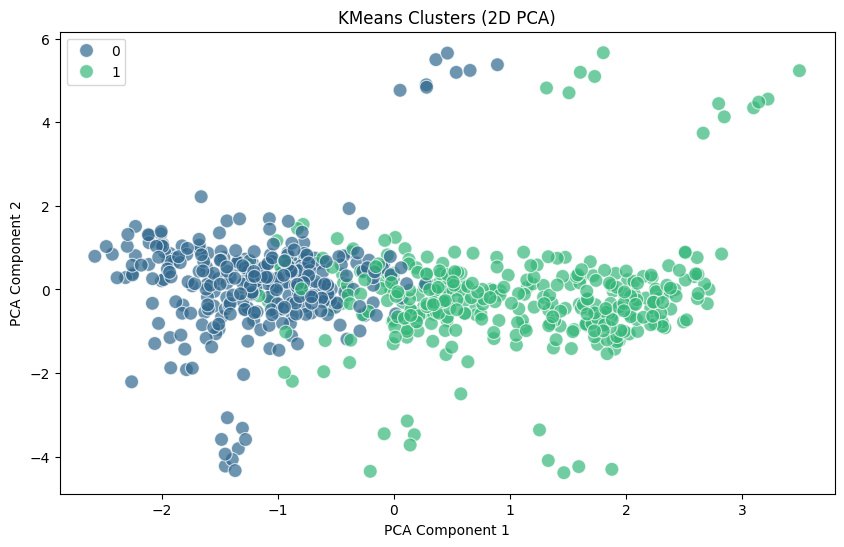

In [166]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test_pca[:,0],
                y=X_test_pca[:,1],
                hue=test_clusters,
                palette='viridis',
                s=100, alpha=0.7)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters (2D PCA)")
plt.show()

KMeans doesnt have class weights and due to binary + imbalance it doesnt perform that well giving recall and precision of 1 to be 0

** Advance Algos **
## Random Forest 

In [167]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators= 100,
                           random_state=42,
                           class_weight='balanced')

rf.fit(X_train, y_train)
y_pred_tree = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Accuracy: 0.9235382308845578

Confusion Matrix:
 [[570   1]
 [ 50  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       571
           1       0.98      0.48      0.64        96

    accuracy                           0.92       667
   macro avg       0.95      0.74      0.80       667
weighted avg       0.93      0.92      0.91       667



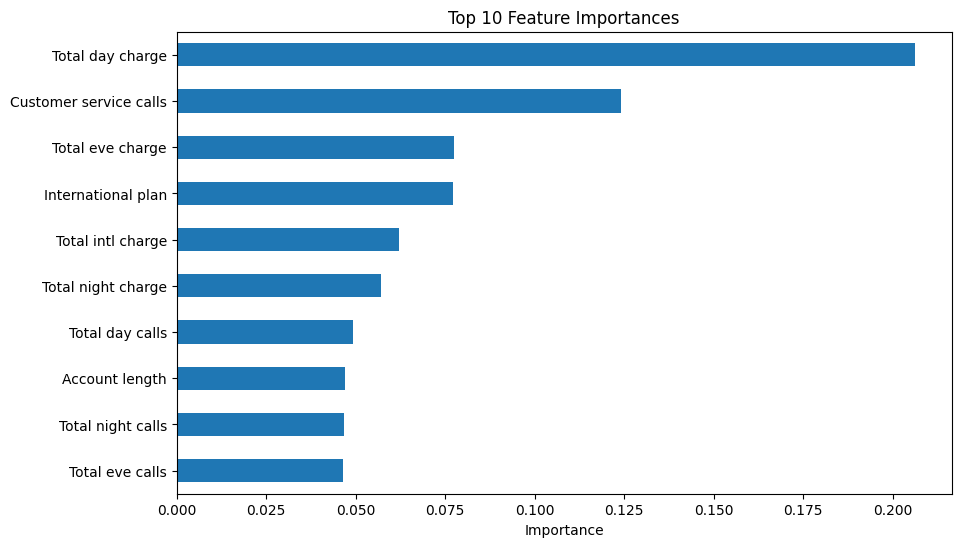

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=combined_df.drop(columns=['Churn']).columns)

feat_importances_sorted = feat_importances.sort_values(ascending=False).head(10)

feat_importances_sorted.plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.gca().invert_yaxis() 
plt.show()


In [169]:
print("Top 10 Feature Importances:\n")
print(feat_importances_sorted)

Top 10 Feature Importances:

Total day charge          0.206125
Customer service calls    0.124236
Total eve charge          0.077393
International plan        0.077201
Total intl charge         0.062049
Total night charge        0.057124
Total day calls           0.049216
Account length            0.047039
Total night calls         0.046712
Total eve calls           0.046434
dtype: float64


Basically represents the top 10 imp cols but this doesnt mean other cols aren't impotant. The other cols can help improve the overall model

## SVM (Support Vector Machine)

In [170]:
from sklearn.svm import SVC

In [171]:
svm_model = SVC(
    kernel='rbf',          
    class_weight='balanced', 
    probability=True,    
    random_state=42
)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.823088455772114

Confusion Matrix:
 [[478  93]
 [ 25  71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       571
           1       0.43      0.74      0.55        96

    accuracy                           0.82       667
   macro avg       0.69      0.79      0.72       667
weighted avg       0.88      0.82      0.84       667



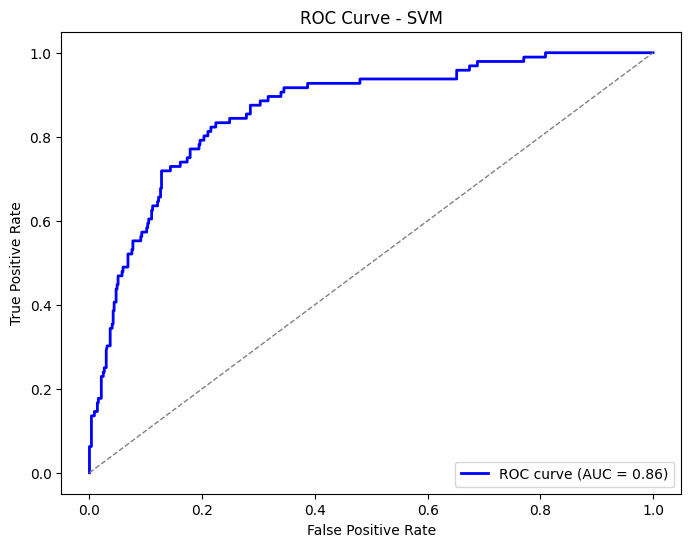

In [172]:
y_prob = svm_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

In [173]:
import pickle

with open("train_test_splilts.pkl", "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

- From All the algo we have tried the decision tree gave the balanced result for us. So we will use decision tree

In [174]:
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(tree, f)